In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

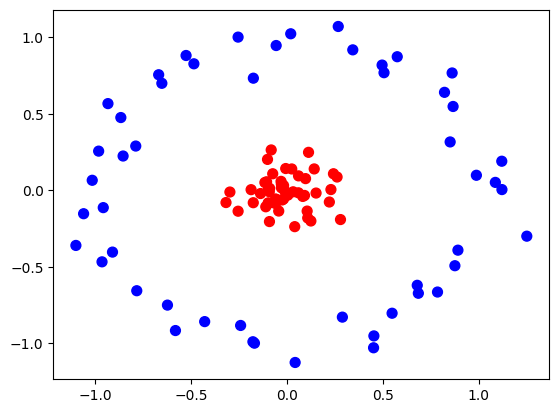

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-8-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


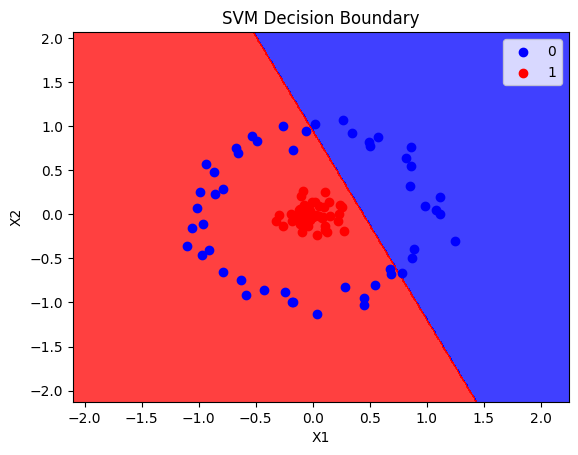

In [9]:
plot_decision_boundary(X, y, classifier)

In [10]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

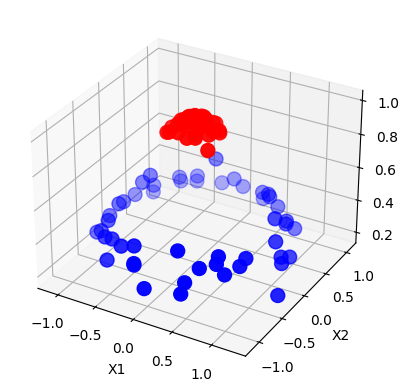

In [11]:
plot_3d_plot(X,y)

In [12]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-8-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


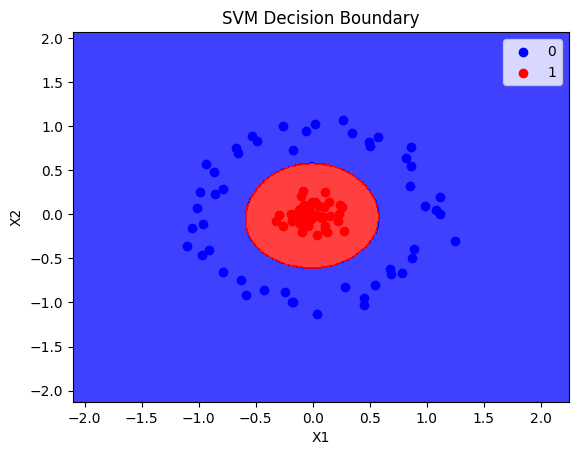

In [14]:
plot_decision_boundary(X, y, rbf_classifier)

In [15]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-8-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


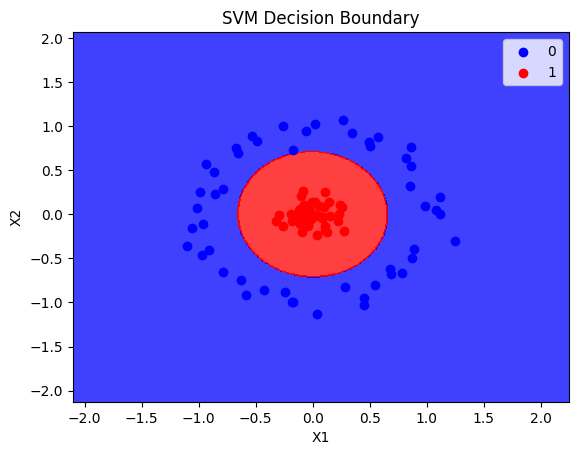

In [17]:
plot_decision_boundary(X, y, poly_classifier)

In [18]:
X

array([[-1.06203408e+00, -1.52834478e-01],
       [ 9.59688927e-02,  7.66065265e-02],
       [ 1.23806166e-01, -2.00388379e-01],
       [-4.86606960e-01,  8.27336781e-01],
       [-3.18361867e-02,  5.87316769e-02],
       [ 5.89114949e-02, -1.60982518e-02],
       [-9.13499731e-02,  1.26809544e-02],
       [ 5.93679656e-02,  9.46027814e-02],
       [-9.83511947e-01,  2.56365115e-01],
       [ 3.66235165e-03, -3.12134769e-02],
       [-7.53028678e-02,  1.08418750e-01],
       [-9.78857545e-02, -8.56535277e-02],
       [-6.70373202e-01,  7.55761976e-01],
       [-7.89920895e-01,  2.89580365e-01],
       [-5.73365097e-02,  9.46866731e-01],
       [-1.07314433e-01,  5.59960997e-02],
       [-5.82785471e-01, -9.16696438e-01],
       [ 1.08624206e+00,  5.19939718e-02],
       [ 3.42457744e-01,  9.18559141e-01],
       [ 4.95360671e-01,  8.19003585e-01],
       [-1.02463129e-01,  2.02321705e-01],
       [-1.10226545e+00, -3.60203160e-01],
       [ 2.39456772e-02,  1.39837953e-01],
       [-2.

In [19]:
np.exp(-(X**2)).sum(1)

array([1.30061935, 1.98498088, 1.94542895, 1.29350921, 1.9955435 ,
       1.99627633, 1.99152911, 1.98757189, 1.3164997 , 1.99901278,
       1.98265972, 1.98315446, 1.20287138, 1.45537328, 1.40468997,
       1.98541902, 1.14359445, 1.30460305, 1.3194328 , 1.29372176,
       1.94944864, 1.17503146, 1.98006207, 1.99541554, 1.95068751,
       1.89686379, 1.26824498, 1.35032891, 1.21679548, 1.12349934,
       1.97718683, 1.30966466, 1.94913828, 1.97991185, 1.36760248,
       1.99880097, 1.92775498, 1.16265255, 1.97094648, 1.34386434,
       1.3108967 , 1.99893076, 1.96521279, 1.26532976, 1.98887968,
       1.31016142, 1.55349892, 1.99072741, 1.99979005, 1.88964649,
       1.99125029, 1.99644268, 1.24923939, 1.38985725, 1.14218236,
       1.24872635, 1.24974893, 1.99031833, 1.3280697 , 1.94361454,
       1.91450501, 1.19028718, 1.26499919, 1.98357454, 1.30309034,
       1.42333592, 1.98397843, 1.94689188, 1.99314002, 1.99735765,
       1.03156392, 1.28541216, 1.99178461, 1.21906731, 1.28003

In [20]:
X_new=np.exp(-(X**2))

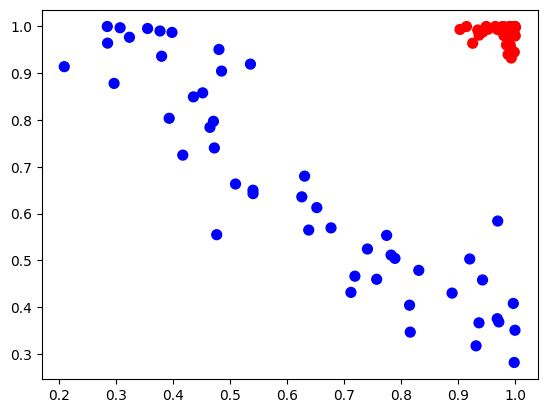

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')